# Importing Libraries

In [38]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
from wordcloud import WordCloud, STOPWORDS
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

# Loading Files

In [39]:
combined_df = pd.read_pickle('combined.pkl') # we will work with this one for our EDA
backup_df = pd.read_pickle('backup.pkl') # dont do anything with it this is the original dataframe without any alterations

all_dataframes = [] # Contains individual data frames for all countries in case we need to work with any of them individually
with open('all_dataframes.pkl', 'rb') as f:
    all_dataframes = pickle.load(f)

# Ratio of likes-dislikes in different categories

It can be seen from the graph that category 'Pets and Animals' is the most liked one since it has the highest likes-dislikes
ratio whereas 'News and Politics' is the least liked one.

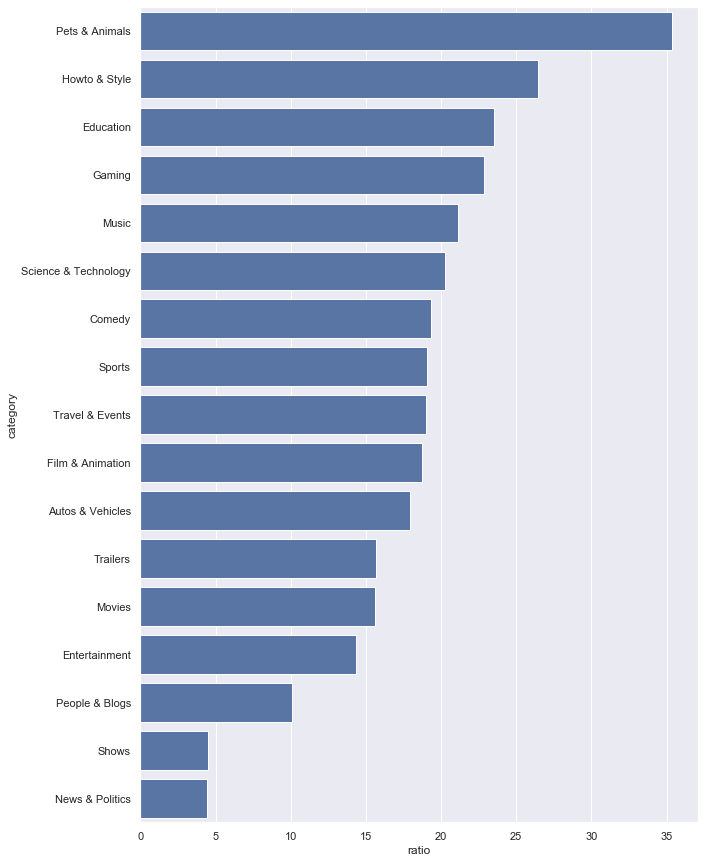

In [40]:
likesdf = combined_df.groupby('category')['likes'].agg('sum') # calculating total likes for each category
dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum') # calculating total dislikes for each category

ratiodf = likesdf/dislikesdf # calculating ratios of likes to dislikes
ratiodf = ratiodf.sort_values(ascending=False).reset_index() # most liked category to appear on top

# plotting bar chart
ratiodf.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=ratiodf,
            label="Likes-Dislikes Ratio", color="b")

# Users like videos from which category more

- Observations :
(1) Apart from RU and GB, category most liked by the users in each of the other countries is 'Entertainment'.
(2) Viewers from RU prefer the category 'People and Blogs' the most.
(3) Viewers from GB prefer the category 'Music' the most.
(4) Categories 'Shows', 'Movies', and 'Trailers' were the least liked ones in almost all of the countries.

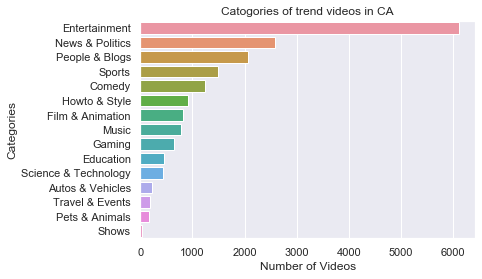

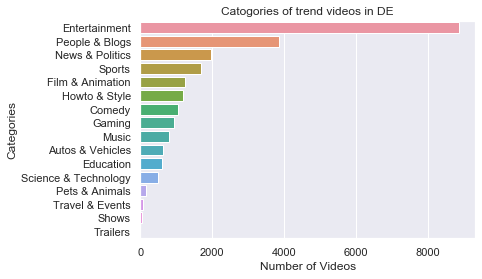

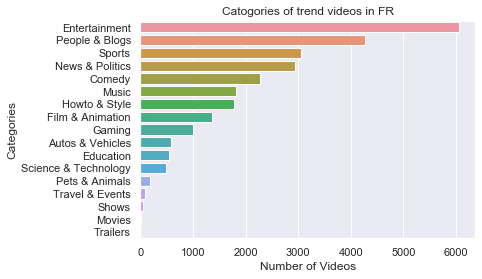

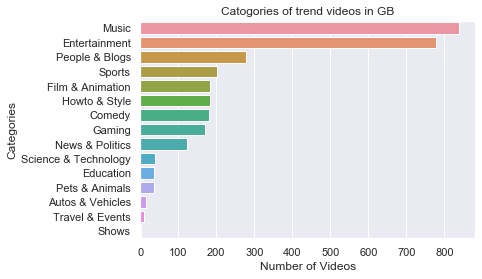

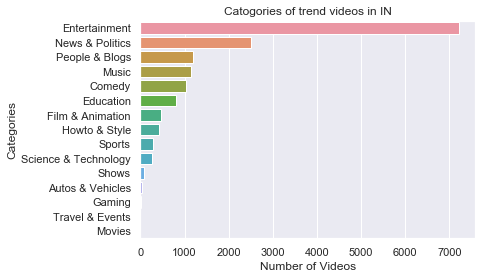

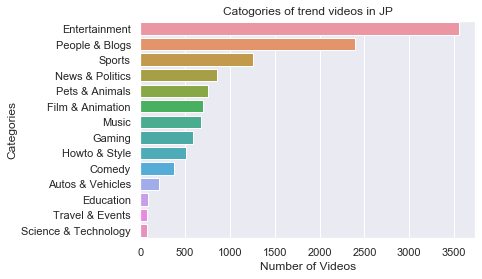

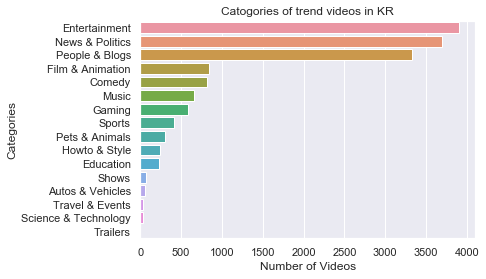

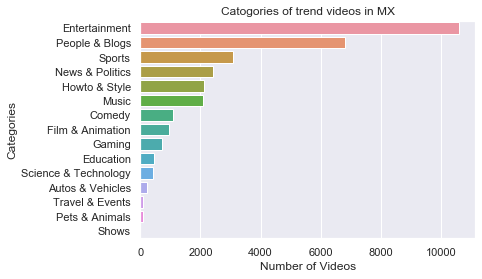

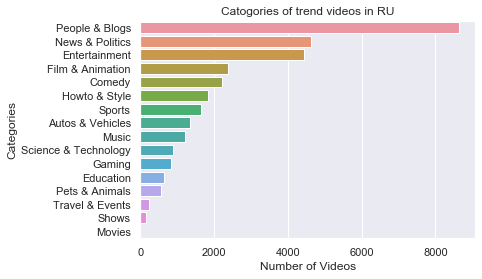

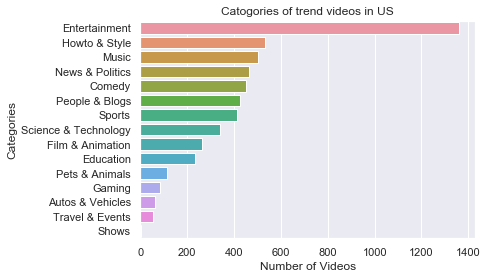

In [41]:
# Getting names of all countries
countries = []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)

for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()


# Top 5 videos that are on trending in each country?

Observation: Users from every country mostly prefer videos belonging to the categories of 'Music' and 'Entertainment', potentially meaning users usually use the platform for recreational purposes in comparisons to other uses.

In [42]:
temporary = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['views'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are on trending
    temporary.append(temp)

The dataframes that follow show which top 5 videos were on trending in each of the country along with their channel_title, category, and views.

In [43]:
# CA
temporary[0][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,137843120,3014479
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,98938809,3037318
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,89930713,2606665
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,80738011,5053338
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,61163906,629164


In [44]:
# DE
temporary[1][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811217
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,80360459,2513103
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,73463137,4924056
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,73432600,2478908
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,50896717,550476


In [45]:
# FR
temporary[2][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,100911567,2656682
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,65396157,4750254
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,60776509,2183745
TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,47078714,1763400
BhIEIO0vaBE,To Our Daughter,Kylie Jenner,People & Blogs,44818108,0


In [46]:
# GB
temporary[3][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,424538912,2818771
9jI-z9QN6g8,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,Music,337621571,2581961
kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,328860380,3823879
wfWkmURBNv8,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,Music,288811992,1618180
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,259721696,5444541


In [47]:
# IN
temporary[4][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,125432237,2912710
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,89930713,2606663
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,53822757,1250535
QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,45064699,1494997
rRr1qiJRsXk,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,44171797,780895


In [48]:
# JP
temporary[5][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
7C2z4GqqS5E,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,62796390,4470923
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,39128403,1077732
QwievZ1Tx-8,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,30180849,1242239
32sYGCOYJUM,CHáº Y NGAY ÄI | RUN NOW | SÆ N TÃ™NG M-TP | ...,SÆ¡n TÃ¹ng M-TP Official,Music,27470728,753626
tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,24262331,1249417


In [49]:
# KR
temporary[6][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,113876217,2811223
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,87450245,2584675
7C2z4GqqS5E,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,87430865,5150839
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,73432600,2478908
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,49185287,1204868


In [50]:
# MX
temporary[7][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,100912384,2656698
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,74789251,2444976
7C2z4GqqS5E,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,62796390,4470923
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,50896717,550478
#NAME?,Maluma - El PrÃ©stamo (Official Video),MalumaVEVO,Music,44726356,575878


In [51]:
# RU
temporary[8][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
7C2z4GqqS5E,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,62796390,4470923
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,52611730,1891836
BhIEIO0vaBE,To Our Daughter,Kylie Jenner,People & Blogs,35832484,0
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,31648454,1405392
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,27973210,850378


In [52]:
# US
temporary[9][['title', 'channel_title', 'category', 'views', 'likes']]

,title,channel_title,category,views,likes
video_id,,,,,
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,225211923,5023450
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,149376127,3093544
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,148689896,3094021
zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,139334502,1425496
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,123010920,5613827


# Is the most liked video also the most trending video

Although it may not seem easily visible, we concluded that most liked video is not the most trending one. This was further proven when we continued deeper into the data set and supporting information, we came to the conclusion that the most trending video is often the most viewed video (in combination with several other factors).

In [53]:
temporary = []
for df in all_dataframes:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)



In [54]:
# CA
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [55]:
# DE
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [56]:
# FR
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [57]:
# GB
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [58]:
# IN
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [59]:
# JP
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [60]:
# KR
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [61]:
# MX
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [62]:
# RU
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


In [63]:
# US
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


# Maximum number of days to trending status for a video

Just change the index to see plots for other countries as well.

In [64]:
temporary = []

for data in all_dataframes:
    temp = data
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
    

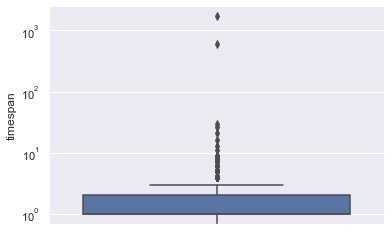

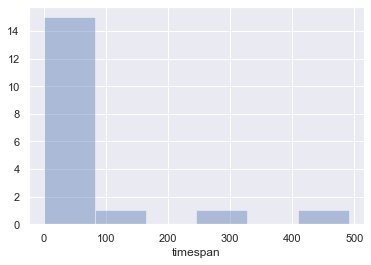

In [65]:
to_trending = temporary[0].sample(1000).groupby('video_id').timespan.max() # CA
sns_ax = sns.boxplot(y = to_trending)
_ = sns_ax.set(yscale = "log")
plt.show()
_ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)


As we can see from both plots above, most videos take less a 100 days to reach the trending page. This can be attributed to viral natural of content on the internet, that if some online content is popular, it will often be shared and viewed within it's short time span of relevancy.

# Users like videos from which category more

We also decided to check which category overall had the most likes from all the categories.

Observation: Most liked category is 'Entertainment' for all countries. This shows user preference to use YouTube as an entertainment platform.

In [66]:
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

,views,likes
category,,
Entertainment,17588684816,471875235
Music,18175188197,444810358
Comedy,4573395735,218752101
People & Blogs,5606737191,157767404
Howto & Style,2215631503,77250720


# Users comment on which category the most

Again entertainment is the most commented category.

In [67]:
temp = combined_df
temp = temp.groupby('category')['views','likes', 'comment_count'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='comment_count', ascending=False).head()
temp

,views,likes,comment_count
category,,,
Entertainment,17588684816,471875235,68370734
Music,18175188197,444810358,36232011
People & Blogs,5606737191,157767404,24662974
Comedy,4573395735,218752101,23294928
News & Politics,3470582735,53466715,14956514


# Most used words in tags and description

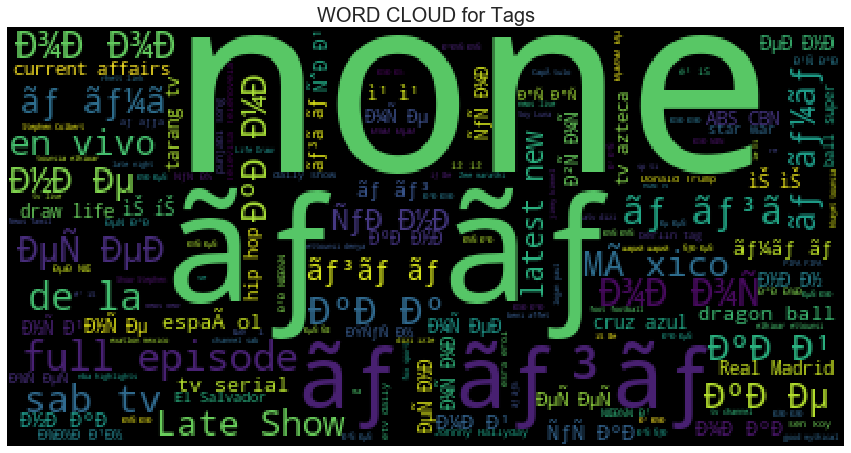

In [68]:
 # For tags
    
 plt.figure(figsize = (15, 15))
 stopwords = set(STOPWORDS)
 wordcloud = WordCloud(
 background_color = 'black',
 stopwords = stopwords,
 max_words = 1000,
 max_font_size = 120,
 random_state = 42
 ).generate(str(combined_df['tags']))
 plt.imshow(wordcloud)
 plt.title('WORD CLOUD for Tags', fontsize = 20)
 plt.axis('off')
 plt.show()

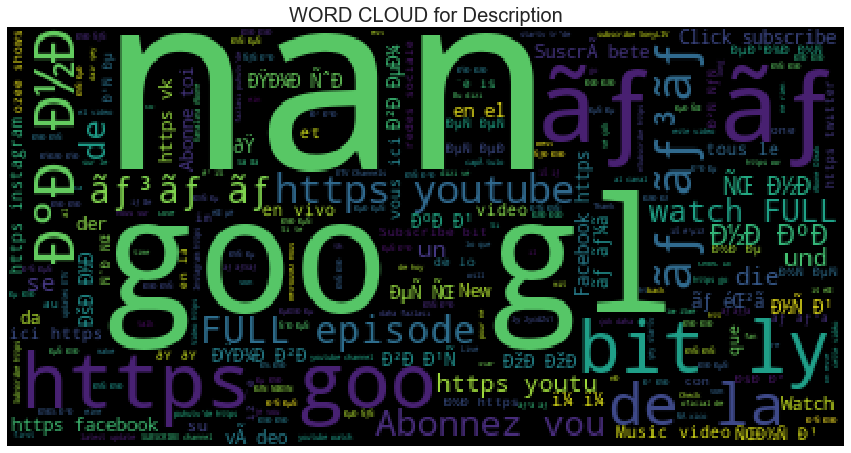

In [69]:
 # For description
    
 plt.figure(figsize = (15, 15))
 stopwords = set(STOPWORDS)
 wordcloud = WordCloud(
 background_color = 'black',
 stopwords = stopwords,
 max_words = 1000,
 max_font_size = 120,
 random_state = 42
 ).generate(str(combined_df['description']))
 plt.imshow(wordcloud)
 plt.title('WORD CLOUD for Description', fontsize = 20)
 plt.axis('off')
 plt.show()

# Corellation between views, likes, dislikes, and comments

Hence there is a positive relation between views and likes, likes and comment_count, dislikes and comment_count

It should be noted that when evaluating the correlation between all the variables, the correlation of each feature with itself is also included, which is always 1, so that is why the graph always has the red diagonal from the upper left to the lower right.

In [70]:
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.768352,0.378172,0.423572
likes,0.768352,1.000000,0.435397,0.700513
dislikes,0.378172,0.435397,1.000000,0.667473
comment_count,0.423572,0.700513,0.667473,1.000000


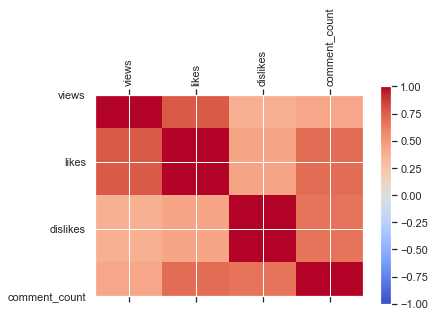

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(col),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(col)
ax.set_yticklabels(col)
plt.show()